# clustering using Kmeans and elbow technique to find number of clusters

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [5]:
df=pd.read_excel("Online.xlsx")

In [6]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income of Employee')

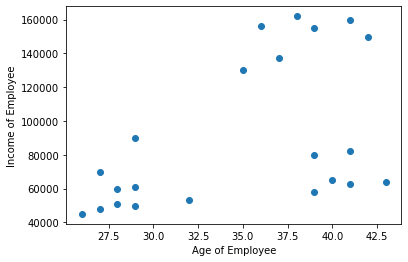

In [9]:
import matplotlib.pyplot as plt

plt.scatter(df['Age'],df['Income($)'])
plt.xlabel("Age of Employee")
plt.ylabel("Income of Employee")

In [22]:

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2])

In [23]:
df['Clusters']=y_predicted

In [24]:
df.head()

,Name,Age,Income($),Clusters
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0


In [28]:
km.labels_

    

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2])

In [29]:
km.cluster_centers_


array([[3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04],
       [3.29090909e+01, 5.61363636e+04]])

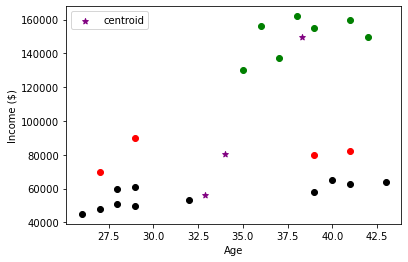

In [38]:
df1 = df[df.Clusters==0]
df2 = df[df.Clusters==1]
df3 = df[df.Clusters==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()


In [48]:
scaler=MinMaxScaler()
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])
df.head()

,Name,Age,Income($),Clusters
0,Rob,0.213675,0.213675,1
1,Michael,0.384615,0.384615,1
2,Mohan,0.136752,0.136752,2
3,Ismail,0.128205,0.128205,2
4,Kory,0.897436,0.897436,0


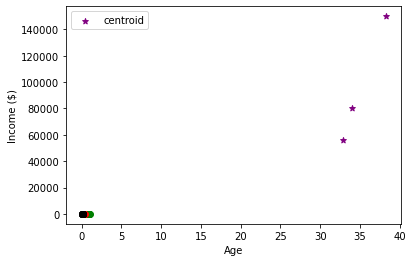

In [49]:
df1 = df[df.Clusters==0]
df2 = df[df.Clusters==1]
df3 = df[df.Clusters==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [57]:
sse=[]
k_range=range(1,10)

for x in k_range:
    km=KMeans(n_clusters=x)
    km.fit_predict(df[['Age','Income($)']])
    km.inertia_
    sse.append(km.inertia_)

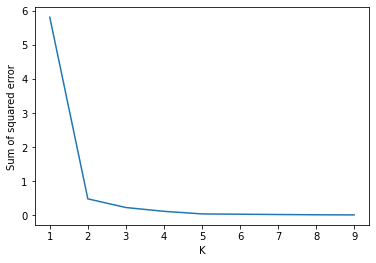

In [60]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)